In [1]:
suppressPackageStartupMessages({
    library(org.Hs.eg.db)
    library(org.Mm.eg.db)
    library(org.Pvitticeps.eg.db)
    library(org.Pmarinus.eg.db)
    library(clusterProfiler)
    library(enrichplot)
    library(ggplot2)
})
options(enrichplot.colours = c("red","blue"))

Warning message:
“package ‘Biobase’ was built under R version 4.3.3”
Warning message:
“package ‘IRanges’ was built under R version 4.3.3”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.3”


In [2]:
# human and mouse packages were download and the background is default rather than only contain protein coding genes
# read protein coding gene IDs as background for human and mouse
Hsap_bg <- read.table("/mnt/data01/yuanzhen/01.Vertebrate_cell_evo/01.data/02.atlas/v_adata/Hsap_pep.ID")$V1
Mmus_bg <- read.table("/mnt/data01/yuanzhen/01.Vertebrate_cell_evo/04.ohno_para_significance//4.GO_enrichment/Mmus_bg")$V1

In [3]:
Hsap_markers <- read.delim('../1.markers/Hsap.Ast.markers.txt')
Mmus_markers <- read.delim('../1.markers/Mmus.Ast.markers.txt')
Pvit_markers <- read.delim('../1.markers/Pvit.Ast.markers.txt')
Pmar_markers <- read.delim('../1.markers/Pmar.Ast.markers.txt')

In [4]:
table(Mmus_markers$cluster)


                                 Bergmann glia 
                                           467 
          Dentate gyrus radial glia-like cells 
                                           566 
Dorsal midbrain Myoc-expressing astrocyte-like 
                                           194 
         Non-telencephalon astrocytes, fibrous 
                                           227 
    Non-telencephalon astrocytes, protoplasmic 
                                          3629 
                          Olfactory astrocytes 
                                            78 
    Subventricular zone radial glia-like cells 
                                           911 
             Telencephalon astrocytes, fibrous 
                                            89 
        Telencephalon astrocytes, protoplasmic 
                                           390 

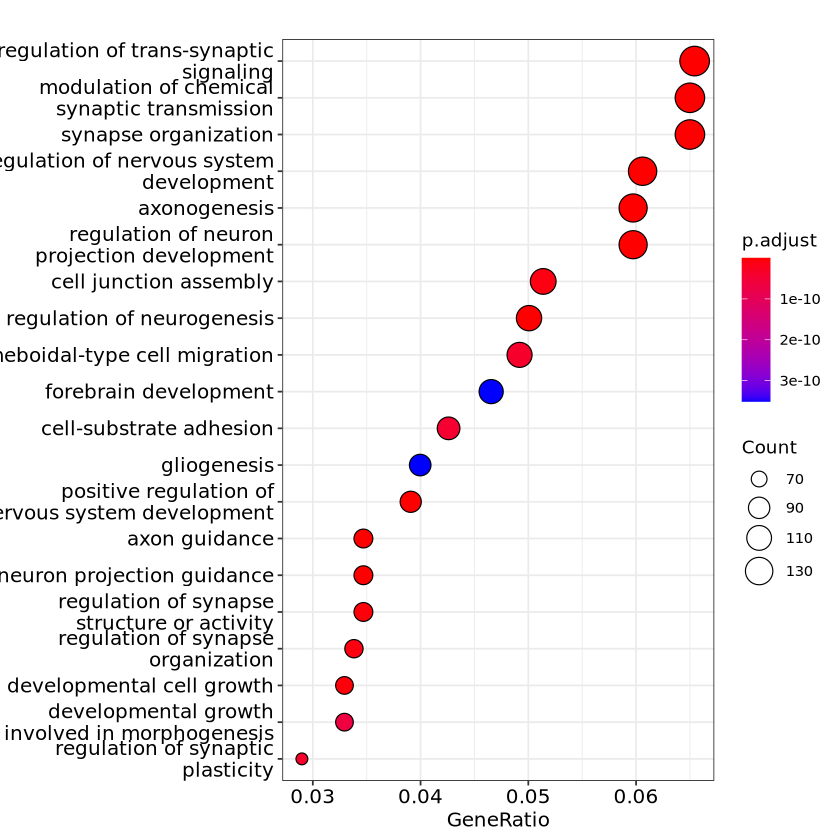

In [9]:
# GO for human
ego2 <- enrichGO(gene         = unique(Hsap_markers$gene),
                 OrgDb         = org.Hs.eg.db,
                 keyType = "ENSEMBL",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,
                 universe = Hsap_bg,
                 ont  = "BP")
#ego2 <- simplify(ego2, cutoff=0.7, by="p.adjust", select_fun=min)
    
fig <- dotplot(ego2, showCategory=20)
fig
#ggsave(filename = "Hsap.AST_subtypes.BP.GO.pdf", fig, width = 6, height = 9)

In [13]:
compare_ego2 <- compareCluster(list(BG = unique(Mmus_markers[Mmus_markers$cluster %in% c('Bergmann glia'), 'gene']), 
                                    nonTele = unique(Mmus_markers[Mmus_markers$cluster %in% c('Non-telencephalon astrocytes, protoplasmic','Non-telencephalon astrocytes, fibrous'), 'gene']),
                            Tele = unique(Mmus_markers[Mmus_markers$cluster %in% c('Telencephalon astrocytes, fibrous','Telencephalon astrocytes, protoplasmic'), 'gene'])),
                       fun="enrichGO", OrgDb = org.Mm.eg.db, keyType = "ENSEMBL", 
                       pAdjustMethod = "BH",
                       qvalueCutoff  = 0.05,
                       universe = Mmus_bg, ont = "BP")

compare_ego2 <- simplify(compare_ego2, cutoff=0.7, by="p.adjust", select_fun=min)
fig <- dotplot(compare_ego2, showCategory = 20)
#ggsave(filename = "Hsap.class.BP.GO.pdf", fig, width = 6, height = 9)

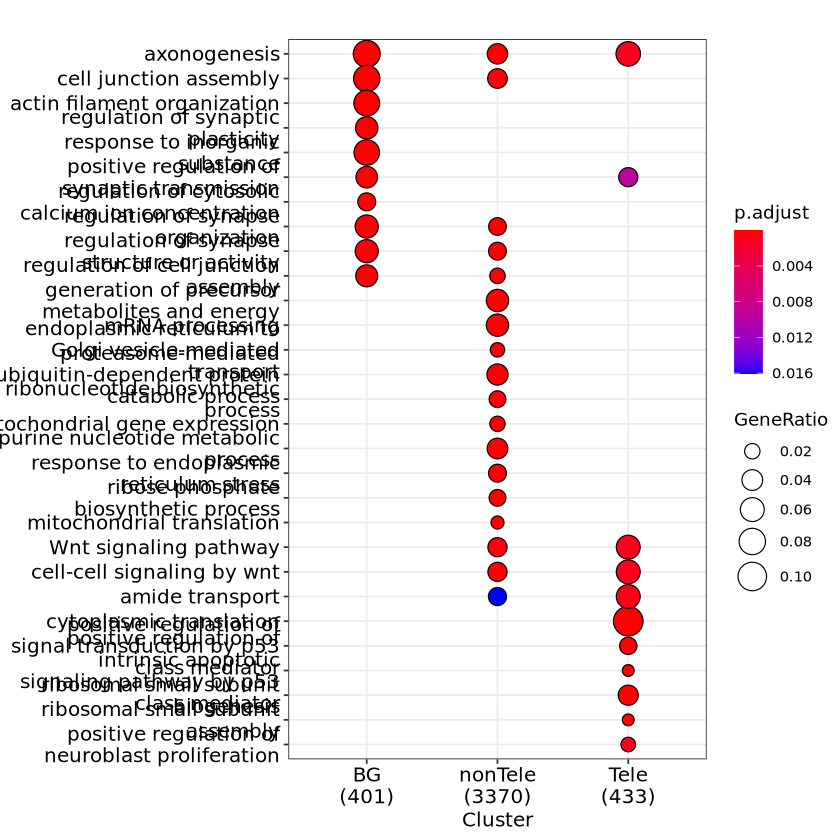

In [16]:
fig <- dotplot(compare_ego2, showCategory = 10)
fig
ggsave(filename = "Mmus.test.pdf", fig, width = 6, height = 9)

In [4]:
# GO for mouse
ego2 <- enrichGO(gene         = unique(Mmus_markers$gene),
                 OrgDb         = org.Mm.eg.db,
                 keyType = "SYMBOL",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,
                 universe = Mmus_bg,
                 ont  = "BP")
#ego2 <- simplify(ego2, cutoff=0.7, by="p.adjust", select_fun=min)

fig <- dotplot(ego2, showCategory=20)
ggsave(filename = "Mmus.AST_subtypes.BP.GO.pdf", fig, width = 6, height = 9)

In [10]:
ego2@result$Description[grepl('development', ego2@result$Description)]

[1] "regulation of neuron projection development"                                       
  [2] "regulation of nervous system development"                                          
  [3] "positive regulation of nervous system development"                                 
  [4] "developmental cell growth"                                                         
  [5] "developmental growth involved in morphogenesis"                                    
  [6] "forebrain development"                                                             
  [7] "negative regulation of neuron projection development"                              
  [8] "renal system development"                                                          
  [9] "muscle tissue development"                                                         
 [10] "kidney development"                                                                
 [11] "sensory system development"                                                        
 [12] "visual system development"                                                         
 [13] "regulation of developmental growth"                                                
 [14] "eye development"                                                                   
 [15] "negative regulation of nervous system development"                                 
 [16] "midbrain development"                                                              
 [17] "kidney epithelium development"                                                     
 [18] "telencephalon development"                                                         
 [19] "dendrite development"                                                              
 [20] "camera-type eye development"                                                       
 [21] "loop of Henle development"                                                         
 [22] "cardiac muscle tissue development"                                                 
 [23] "striated muscle tissue development"                                                
 [24] "positive regulation of cell development"                                           
 [25] "negative regulation of cell development"                                           
 [26] "regulation of vasculature development"                                             
 [27] "neural nucleus development"                                                        
 [28] "glial cell development"                                                            
 [29] "positive regulation of developmental growth"                                       
 [30] "renal tubule development"                                                          
 [31] "retina development in camera-type eye"                                             
 [32] "substantia nigra development"                                                      
 [33] "nephron development"                                                               
 [34] "aorta development"                                                                 
 [35] "artery development"                                                                
 [36] "mesenchyme development"                                                            
 [37] "nephron tubule development"                                                        
 [38] "oligodendrocyte development"                                                       
 [39] "inner ear development"                                                             
 [40] "cerebral cortex development"                                                       
 [41] "nephron epithelium development"                                                    
 [42] "positive regulation of neuron projection development"                              
 [43] "negative regulation of developmental growth"                                       
 [44] "pallium development"                                                              

In [6]:
# GO for chicken
ego2 <- enrichGO(gene         = unique(Ggal_markers$gene),
                 OrgDb         = org.Ggallus.eg.db,
                 keyType = "GID",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,
                 universe = Ggal_bg,
                 ont  = "BP")
ego2 <- simplify(ego2, cutoff=0.7, by="p.adjust", select_fun=min)
    
fig <- dotplot(ego2, showCategory=20)
ggsave(filename = "Ggal.cerebellar_subnuclei.BP.GO.pdf", fig, width = 6, height = 9)

In [5]:
# comparing of class A and B
Hsap_markers <- read.delim('../1.markers/human.ex.DEGs.classAB.EnsemblID.txt')
Mmus_markers <- read.delim('../1.markers/mouse.ex.DEGs.classAB.EnsemblID.txt')
Ggal_markers <- read.delim('../1.markers/chicken.ex.DEGs.classAB.EnsemblID.txt')

Warning message in file(file, "rt"):
“cannot open file '../1.markers/human.ex.DEGs.classAB.EnsemblID.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [8]:
compare_ego2 <- compareCluster(list(classA = unique(Hsap_markers[Hsap_markers$cluster == 'A', 'gene']), 
                            classB = unique(Hsap_markers[Hsap_markers$cluster == 'B', 'gene'])),
                       fun="enrichGO", OrgDb = org.Hs.eg.db, keyType = "ENSEMBL", 
                       pAdjustMethod = "BH",
                       qvalueCutoff  = 0.05,
                       universe = Hsap_bg, ont = "BP")

compare_ego2 <- simplify(compare_ego2, cutoff=0.7, by="p.adjust", select_fun=min)
fig <- dotplot(compare_ego2, showCategory = 20)
ggsave(filename = "Hsap.class.BP.GO.pdf", fig, width = 6, height = 9)

In [9]:
compare_ego2 <- compareCluster(list(classA = unique(Mmus_markers[Mmus_markers$cluster == 'A', 'gene']),
                            classB = unique(Mmus_markers[Mmus_markers$cluster == 'B', 'gene'])),
                       fun="enrichGO", OrgDb = org.Mm.eg.db, keyType = "ENSEMBL",
                       pAdjustMethod = "BH",
                       qvalueCutoff  = 0.05,
                       universe = Mmus_bg, ont = "BP")

compare_ego2 <- simplify(compare_ego2, cutoff=0.7, by="p.adjust", select_fun=min)
fig <- dotplot(compare_ego2, showCategory = 20)
ggsave(filename = "Mmus.class.BP.GO.pdf", fig, width = 6, height = 9)

In [10]:
compare_ego2 <- compareCluster(list(classA = unique(Ggal_markers[Ggal_markers$cluster == 'A', 'gene']),
                            classB = unique(Ggal_markers[Ggal_markers$cluster == 'B', 'gene'])),
                       fun="enrichGO", OrgDb = org.Ggallus.eg.db, keyType = "GID",
                       pAdjustMethod = "BH",
                       pvalueCutoff = 0.05,
                       qvalueCutoff  = 0.05,
                       universe = Ggal_bg, ont = "BP")

compare_ego2 <- simplify(compare_ego2, cutoff=0.7, by="p.adjust", select_fun=min)
fig <- dotplot(compare_ego2, showCategory = 20)
ggsave(filename = "Ggal.class.BP.GO.pdf", fig, width = 6, height = 9)